# **GRU Exercise**

## Import libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import layers, Sequential, callbacks
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [73]:
df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [74]:
df = df.drop('ID', axis=1)

In [78]:
# Assuming your datetime column is in 'datetime' format
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month


In [ ]:
df2=df.copy()

In [58]:
# We will use the 'Close' column as our target variable
data = df[['Vehicles']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60  # Using 60 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
    

## Data Exploration



## Feature Engineering (if needed)



## Exploratory Data Analysis


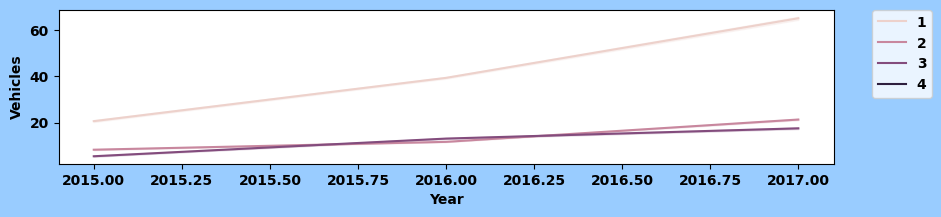

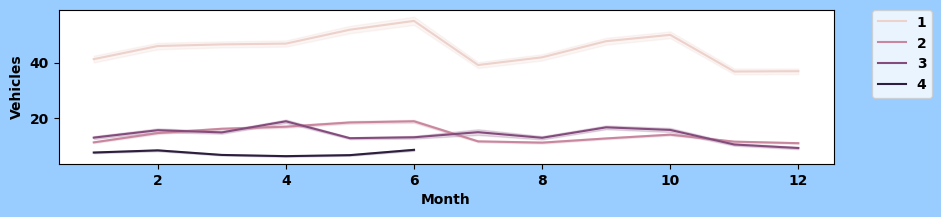

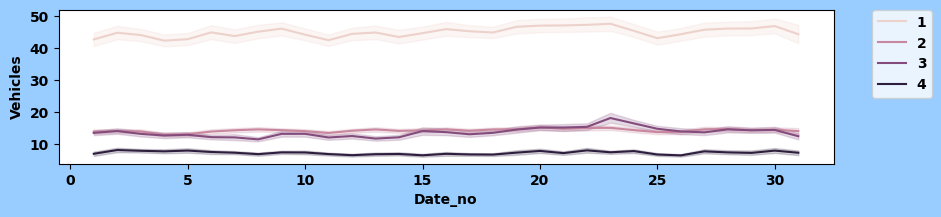

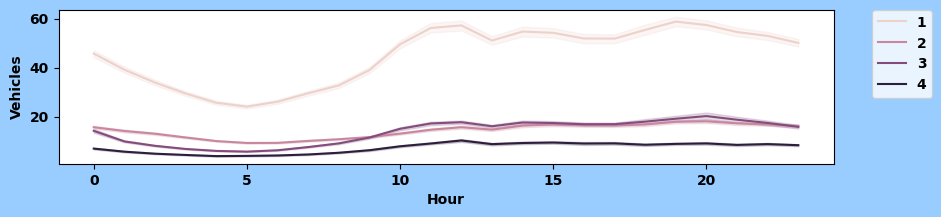

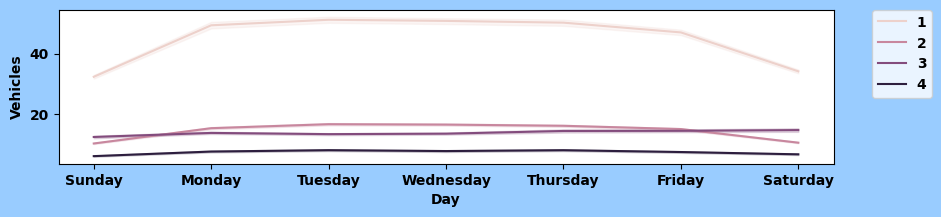

In [48]:
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10, 2),facecolor="#99ccff")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df2, hue="Junction")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

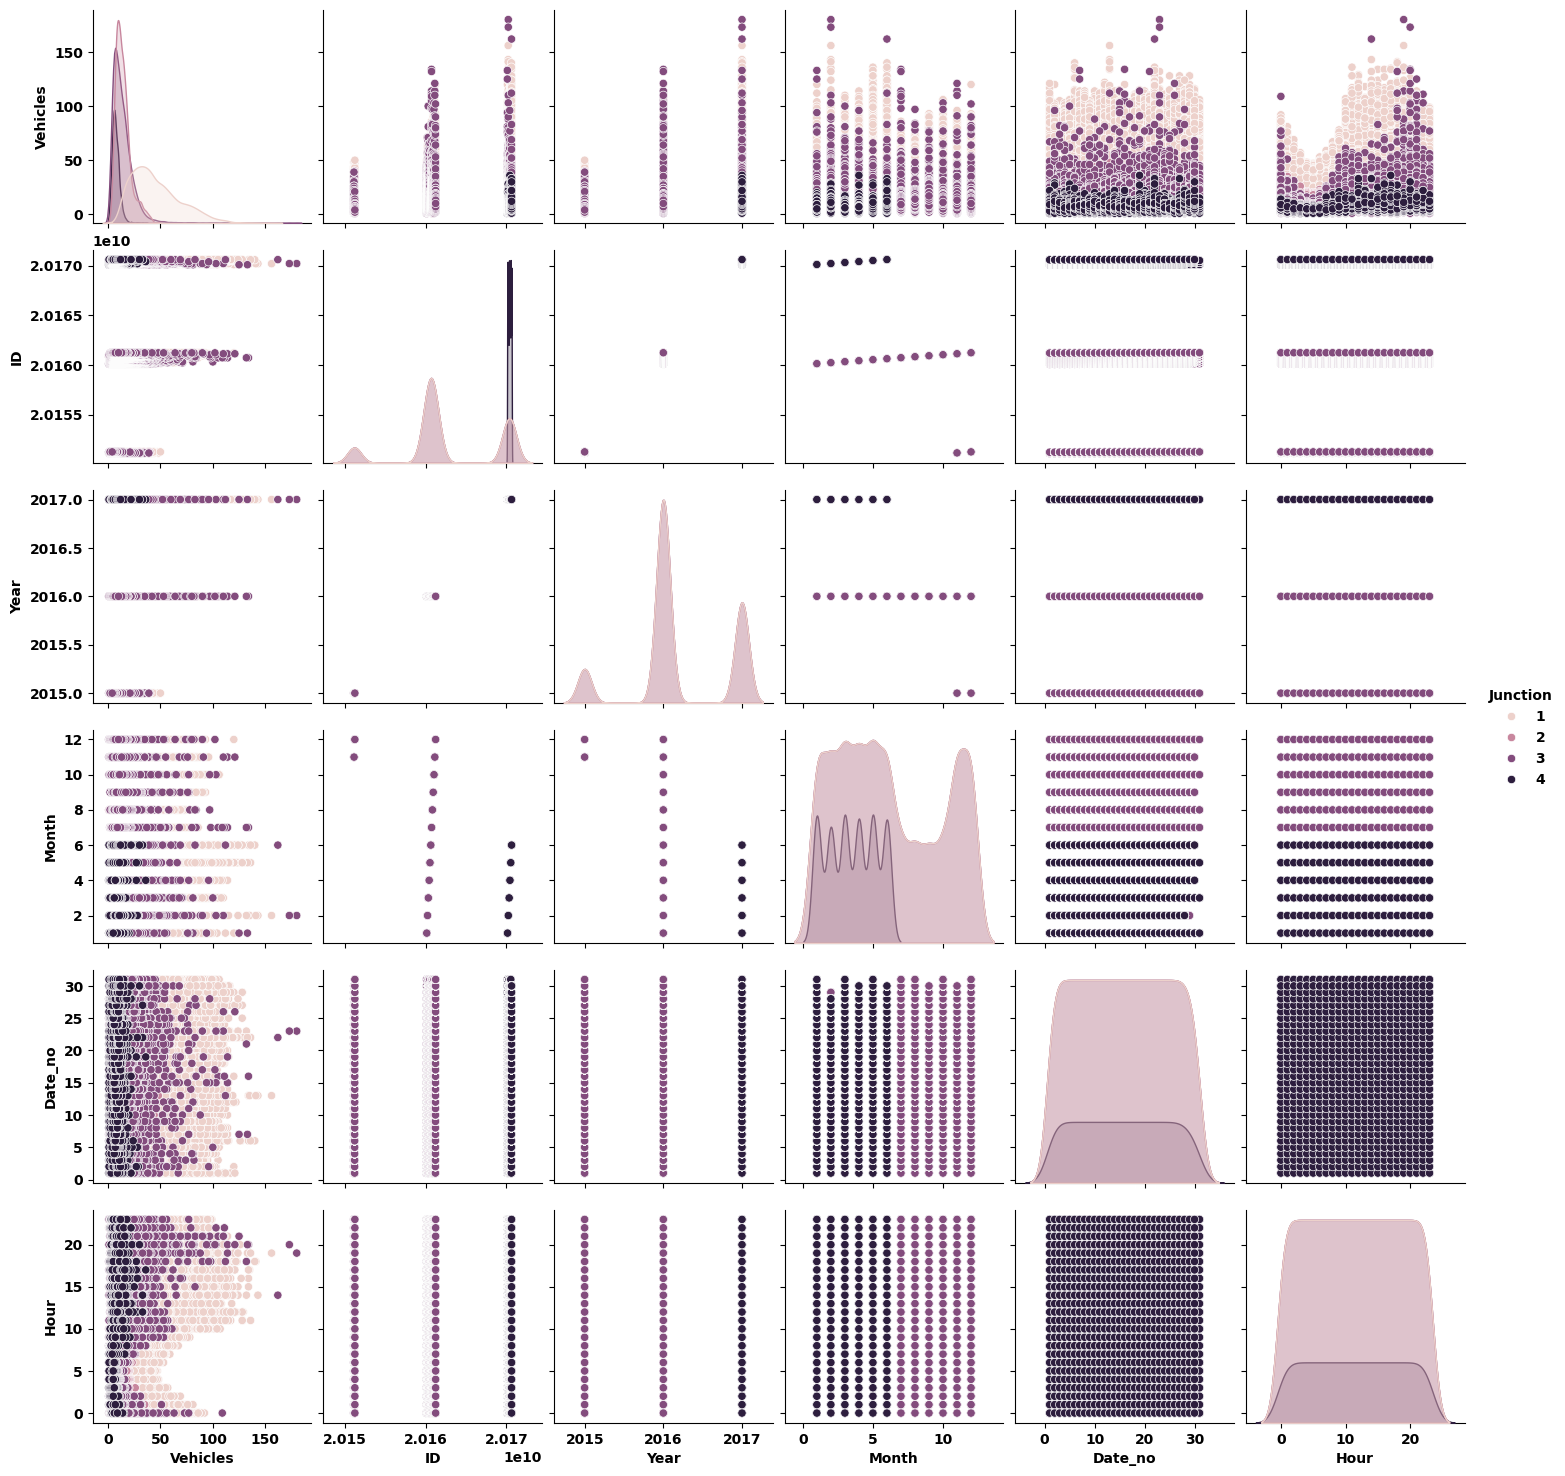

In [49]:
sns.pairplot(data=df, hue= "Junction")

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])
df[['Junction']] = scaler.fit_transform(df[['Junction']])

In [51]:
X = df.drop('Vehicles',axis=1)
y=df.Vehicles

## split into train and test sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Model Building



In [59]:
# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    

Epoch 1/10


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1202/1202 ━━━━━━━━━━━━━━━━━━━━ 106s 84ms/step - loss: 0.0019 - val_loss: 9.4799e-04
Epoch 2/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 97s 81ms/step - loss: 7.2902e-04 - val_loss: 8.7182e-04
Epoch 3/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 96s 80ms/step - loss: 6.9101e-04 - val_loss: 8.5817e-04
Epoch 4/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 95s 79ms/step - loss: 6.2097e-04 - val_loss: 7.8722e-04
Epoch 5/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 92s 76ms/step - loss: 5.8408e-04 - val_loss: 7.7136e-04
Epoch 6/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 103s 86ms/step - loss: 5.5892e-04 - val_loss: 7.6192e-04
Epoch 7/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 99s 82ms/step - loss: 5.4937e-04 - val_loss: 7.9836e-04
Epoch 8/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 94s 78ms/step - loss: 5.4204e-04 - val_loss: 7.6216e-04
Epoch 9/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 92s 77ms/step - loss: 5.5865e-04 - val_loss: 7.7258e-04
Epoch 10/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 106s 88ms/step - loss: 4.9354e-04 - val_loss: 7.7255e-04


## Fitting The Model



## Make preductuion and evaluatuin matrix.

In [60]:
# Make predictions
y_pred = model.predict(X_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step


In [61]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.027794843051566893


## Visualize the result

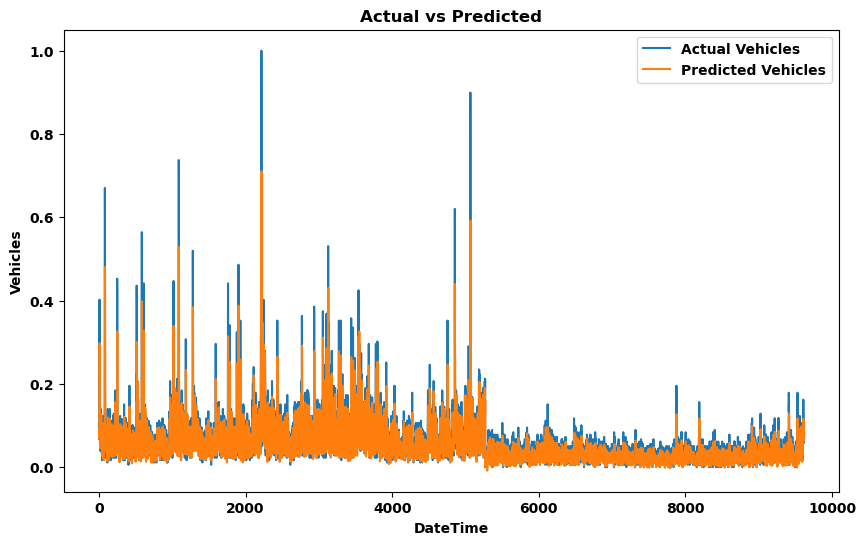

In [87]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Vehicles')
plt.plot(y_pred, label='Predicted Vehicles')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# **Well done** :)